<a href="https://colab.research.google.com/github/IgnacioHC/Trabajo_de_titulo/blob/main/Raw_data_plots_(Cooler_condition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raw data plots

## Imports and load

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import json
import pandas as pd

import random

### Data load

In [ ]:
#path de la carpeta con la data
folder = "/content/drive/MyDrive/F/data/data_raw/"

# Data sampleada a  1[hz]
data_60 = {
    'Temperature sensor 1' : np.loadtxt(folder + "TS1.txt"),
    'Temperature sensor 2' : np.loadtxt(folder + "TS2.txt"),
    'Temperature sensor 3' : np.loadtxt(folder + "TS3.txt"),
    'Temperature sensor 4' : np.loadtxt(folder + "TS4.txt"),
    'Vibration sensor' : np.loadtxt(folder + "VS1.txt"),
    'Cooling efficiency' : np.loadtxt(folder + "CE.txt"),
    'Cooling power' : np.loadtxt(folder + "CP.txt"),
    'Efficiency factor' : np.loadtxt(folder + "SE.txt")
}

# Data sampleada a  10[hz]
data_600 = {
    'Flow sensor 1' : np.loadtxt(folder + "FS1.txt"),
    'Flow sensor 2' : np.loadtxt(folder + "FS2.txt")
}

# Data sampleada a  100[hz]
data_6000 = {
    'Pressure sensor 1' : np.loadtxt(folder + "PS1.txt"),
    'Pressure sensor 2' : np.loadtxt(folder + "PS2.txt"),
    'Pressure sensor 3' : np.loadtxt(folder + "PS3.txt"),
    'Pressure sensor 4' : np.loadtxt(folder + "PS4.txt"),
    'Pressure sensor 5' : np.loadtxt(folder + "PS5.txt"),
    'Pressure sensor 6' : np.loadtxt(folder + "PS6.txt"),
    'Motor power' : np.loadtxt(folder + "EPS1.txt")
}

#Chequear shapes
def check_shapes(data_dict):
  for signal_name , signal_data in data_dict.items():
    print('Shape de',signal_name,signal_data.shape)
  print()

print('Data sampleada a  1[hz]')
check_shapes(data_60)

print('Data sampleada a  10[hz]')
check_shapes(data_600)

print('Data sampleada a  100[hz]')
check_shapes(data_6000)

Data sampleada a  1[hz]
Shape de Temperature sensor 1 (2205, 60)
Shape de Temperature sensor 2 (2205, 60)
Shape de Temperature sensor 3 (2205, 60)
Shape de Temperature sensor 4 (2205, 60)
Shape de Vibration sensor (2205, 60)
Shape de Cooling efficiency (2205, 60)
Shape de Cooling power (2205, 60)
Shape de Efficiency factor (2205, 60)

Data sampleada a  10[hz]
Shape de Flow sensor 1 (2205, 600)
Shape de Flow sensor 2 (2205, 600)

Data sampleada a  100[hz]
Shape de Pressure sensor 1 (2205, 6000)
Shape de Pressure sensor 2 (2205, 6000)
Shape de Pressure sensor 3 (2205, 6000)
Shape de Pressure sensor 4 (2205, 6000)
Shape de Pressure sensor 5 (2205, 6000)
Shape de Pressure sensor 6 (2205, 6000)
Shape de Motor power (2205, 6000)



### Labels load

In [ ]:
profile = np.loadtxt("/content/drive/MyDrive/F/data/labels/profile.txt")
print('Shape de las labels:',profile.shape)
print('Type de las labels:',type(profile))
print()


path = "/content/drive/MyDrive/F/data/ConditionsLabels_dict.json"
with open(path) as json_file:
    ConditionsLabels_dict = json.load(json_file)
  
    # Print the type of data variable
    print("Type:", type(ConditionsLabels_dict))

Shape de las labels: (2205, 5)
Type de las labels: <class 'numpy.ndarray'>

Type: <class 'dict'>


## Util functions

### `get_clases_idx` function

In [ ]:
"""
Recibe:
1. Nombre de la clasificasión

2. Diccionario que asocia cada clsificasión a sus posibles clases y cada clase
a su label (ConditionsLabels_dict)

3. El array con las label correspondientes a la calsificasión (labels_cooler,
labels_pump, labels_valve, etc)

Retorna un diccionario donde asocia a cada una de las clases un índice aleatorio
(entre 0 y 2204) correspondiente a una instacia perteneciente a dicha clase
"""
def get_classes_idx(nombre_clasificasion,ConditionsLabels_dict,profile):
  
  classes_dict = ConditionsLabels_dict[nombre_clasificasion]

  clasificasiones = {
      'Cooler condition' : 0,
      'Valve condition' : 1,
      'Pump leakage' : 2,
      'Accumulator condition' : 3,
      'Stable flag' : 4
  }

  indexes = {}
  for class_name , class_label in classes_dict.items():

    #Se itera sobre las todas las labels y se guardan en una lista los indices
    #de las labels que correspondan a la clase
    class_labels_idxs = []
    for label_idx in range(2204):
      label = profile[label_idx,clasificasiones[nombre_clasificasion]]
      if label == class_label:
        class_labels_idxs.append(label_idx)
      else:
        pass
    
    #Se selecciona uno de los indices de la lista de forma aletoria y se
    #agrega al diccionario
    indexes[class_name] = random.choice(class_labels_idxs)

  return indexes

idxs = get_classes_idx('Pump leakage',ConditionsLabels_dict,profile)
print(idxs)

{'No leakage': 714, 'Weak leakage': 654, 'Severe leakage': 505}


### `get_MeasureUnit` function

In [ ]:
def get_MeasureUnit(sensor_name):

  measurement_units_dict = {
      'Temperature sensor 1' : 'Temperature [°C]',
      'Temperature sensor 2' : 'Temperature [°C]',
      'Temperature sensor 3' : 'Temperature [°C]',
      'Temperature sensor 4' : 'Temperature [°C]',
      'Vibration sensor' : 'Speed [mm/s]',
      'Cooling efficiency' : 'Efficiency [%]',
      'Cooling power' : 'Power [kW]',
      'Efficiency factor' : 'Efficiency [%]',
      'Flow sensor 1' : 'Water flow [L/min]',
      'Flow sensor 2' : 'Water flow [L/min]',
      'Pressure sensor 1' : 'Pressure [bar]',
      'Pressure sensor 2' : 'Pressure [bar]',
      'Pressure sensor 3' : 'Pressure [bar]',
      'Pressure sensor 4' : 'Pressure [bar]',
      'Pressure sensor 5' : 'Pressure [bar]',
      'Pressure sensor 6' : 'Pressure [bar]',
      'Motor power' : 'Power [W]'}

  for key in measurement_units_dict.keys():
    if key == sensor_name:
      return measurement_units_dict[sensor_name]

#Test
print(get_MeasureUnit('Flow sensor 1'))

Water flow [L/min]


### `plt_RawSignal` function

In [ ]:
"""
sensors_dict: diccionario que contiene la data separada por sensores de la
              forma {'sensor_name' : data_sensor}


"""

def plt_RawSignals(sensors_dict,nombre_clasificasion,ConditionsLabels_dict,
                   profile,fig_sz=(14,9),dpi=200,subplt=(2,2)):
  #Figure settings
  plt.figure(figsize=fig_sz , dpi=dpi)

  #Subplots
  for sensor_name in list(sensors_dict):

    sensor_data = sensors_dict[sensor_name]

    #Vector de tiempo
    largo_VectorTiempo = sensor_data.shape[1]
    dt = 60/largo_VectorTiempo # Espaciado de tiempo
    t = np.linspace(0,dt*(largo_VectorTiempo-1),largo_VectorTiempo)

    #Posición del subplot
    i = list(sensors_dict).index(sensor_name) + 1
    m,n = subplt
    plt.subplot(m,n,i)

    #Se itera sobre las clases que se quieren predecir
    indexes = get_classes_idx(nombre_clasificasion,
                              ConditionsLabels_dict,
                              profile)
    
    for class_name , class_idx in indexes.items():
      plt.plot(t,sensor_data[class_idx,:],label=class_name)
      #Save plot


    #FigText
    title = 'Señales raw ' + nombre_clasificasion + '\n{}'.format(sensor_name)
    plt.title(title,size=12)
    plt.xlabel('Tiempo [segundos]',size=11)
    plt.ylabel(get_MeasureUnit(sensor_name),size=11)

    #Legend
    plt.legend()

  plt.tight_layout()
  plt.show()

# Plots
A continuación se plotea por cada uno de los 17 sensores,
1 instnacia (ciclo de operación) perteneciente a cada una de las 3 clases de la clasificasión del estado de salud del enfriador.   

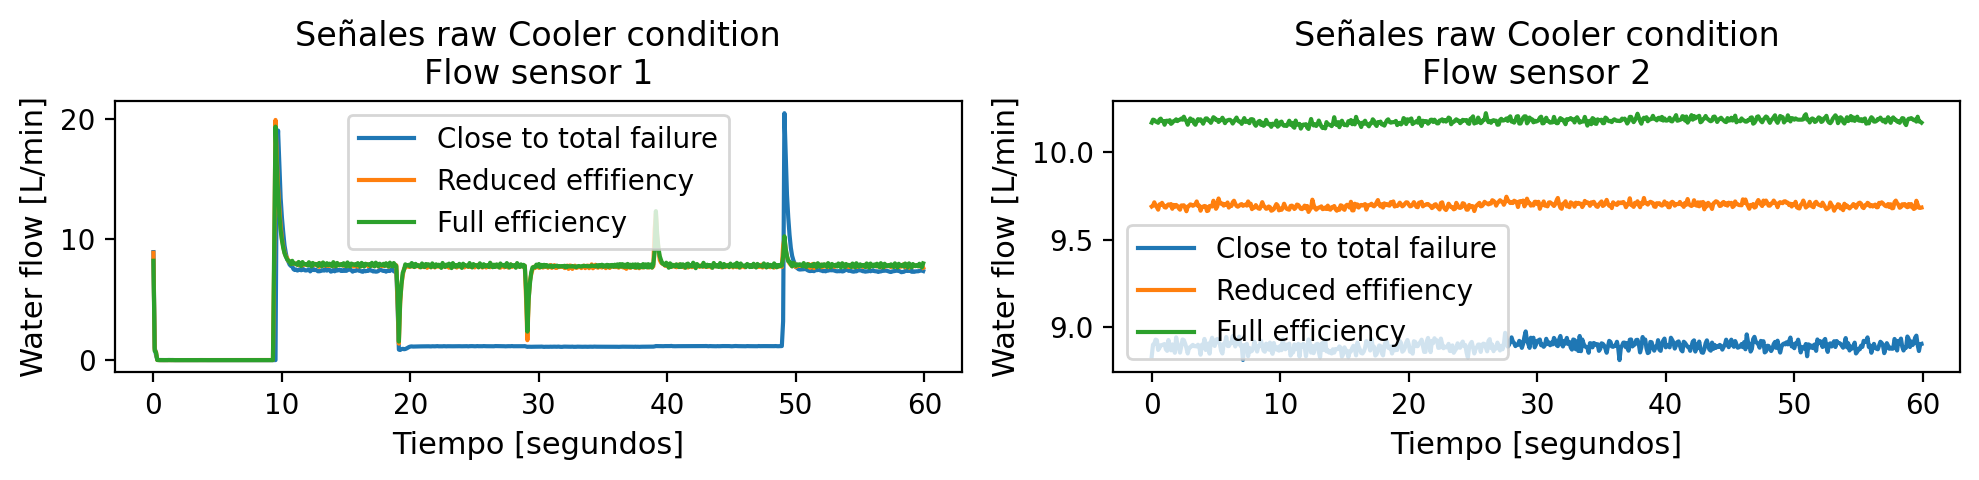

In [ ]:
plt_RawSignals(data_600,
               'Cooler condition',
               ConditionsLabels_dict,
               profile,
               fig_sz=(10,2.5),
               subplt=(1,2))

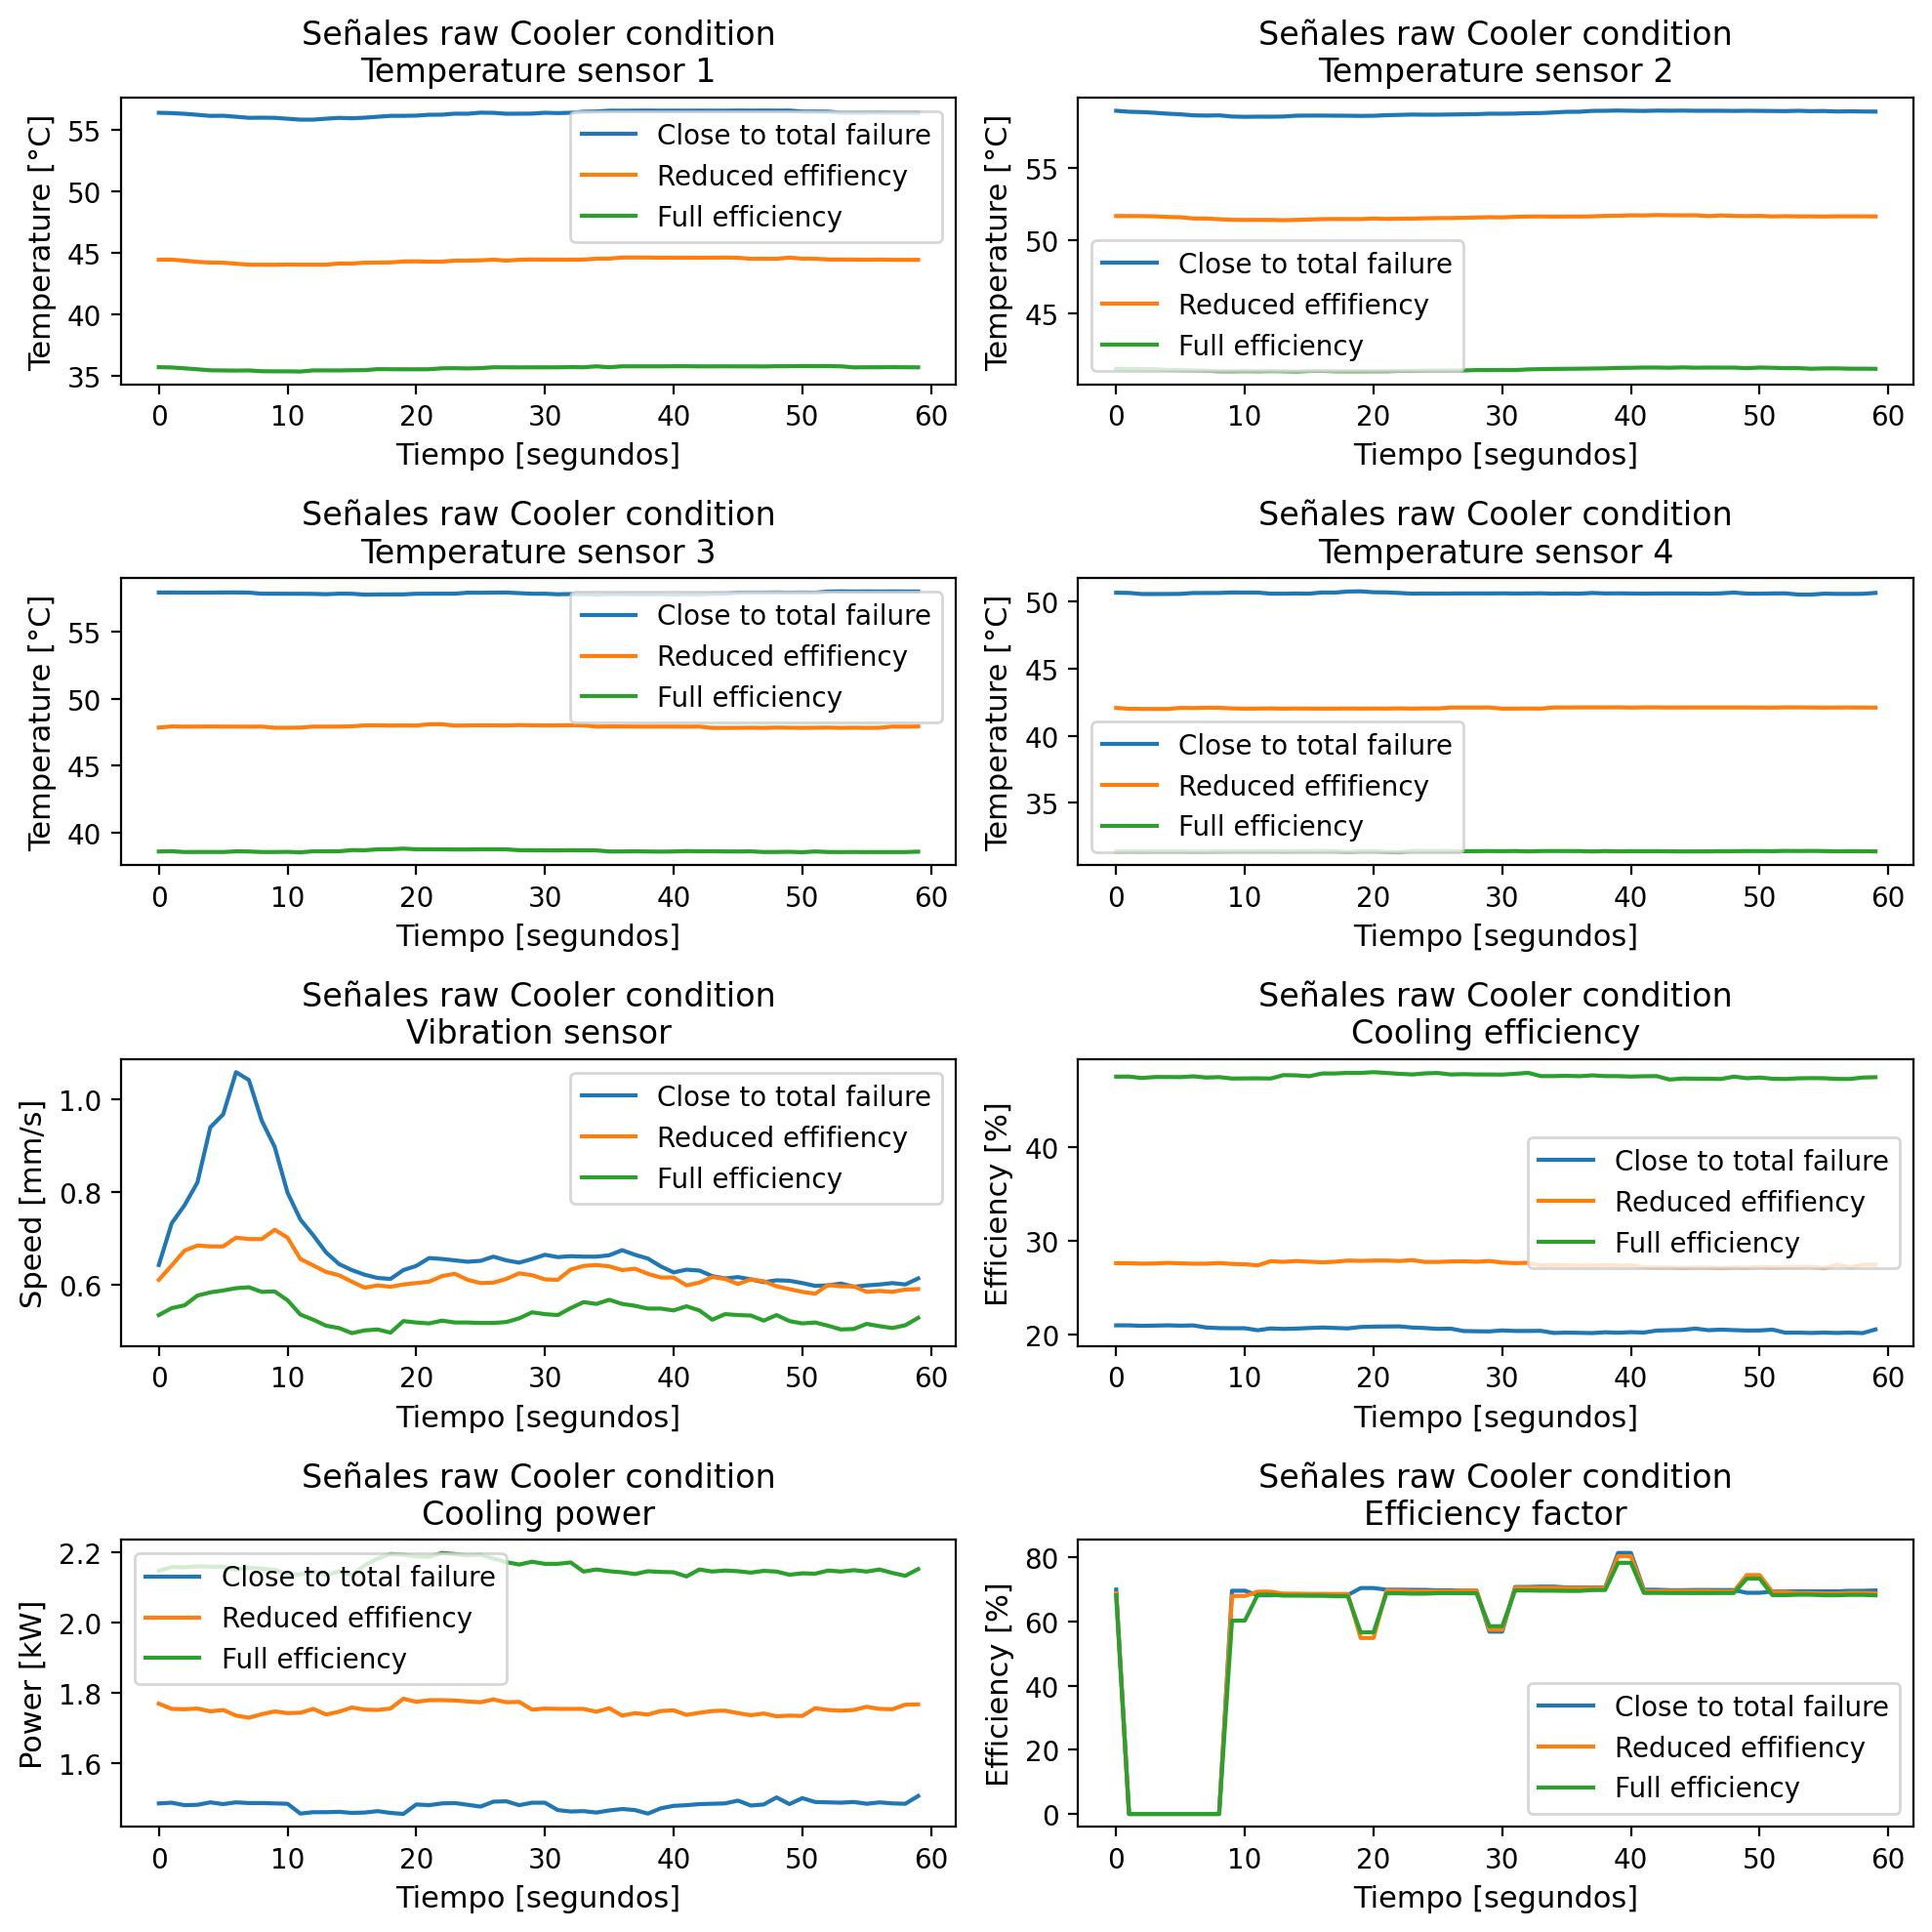

In [ ]:
plt_RawSignals(data_60,
               'Cooler condition',
               ConditionsLabels_dict,
               profile,               
               fig_sz=(10,10),
               subplt=(4,2))

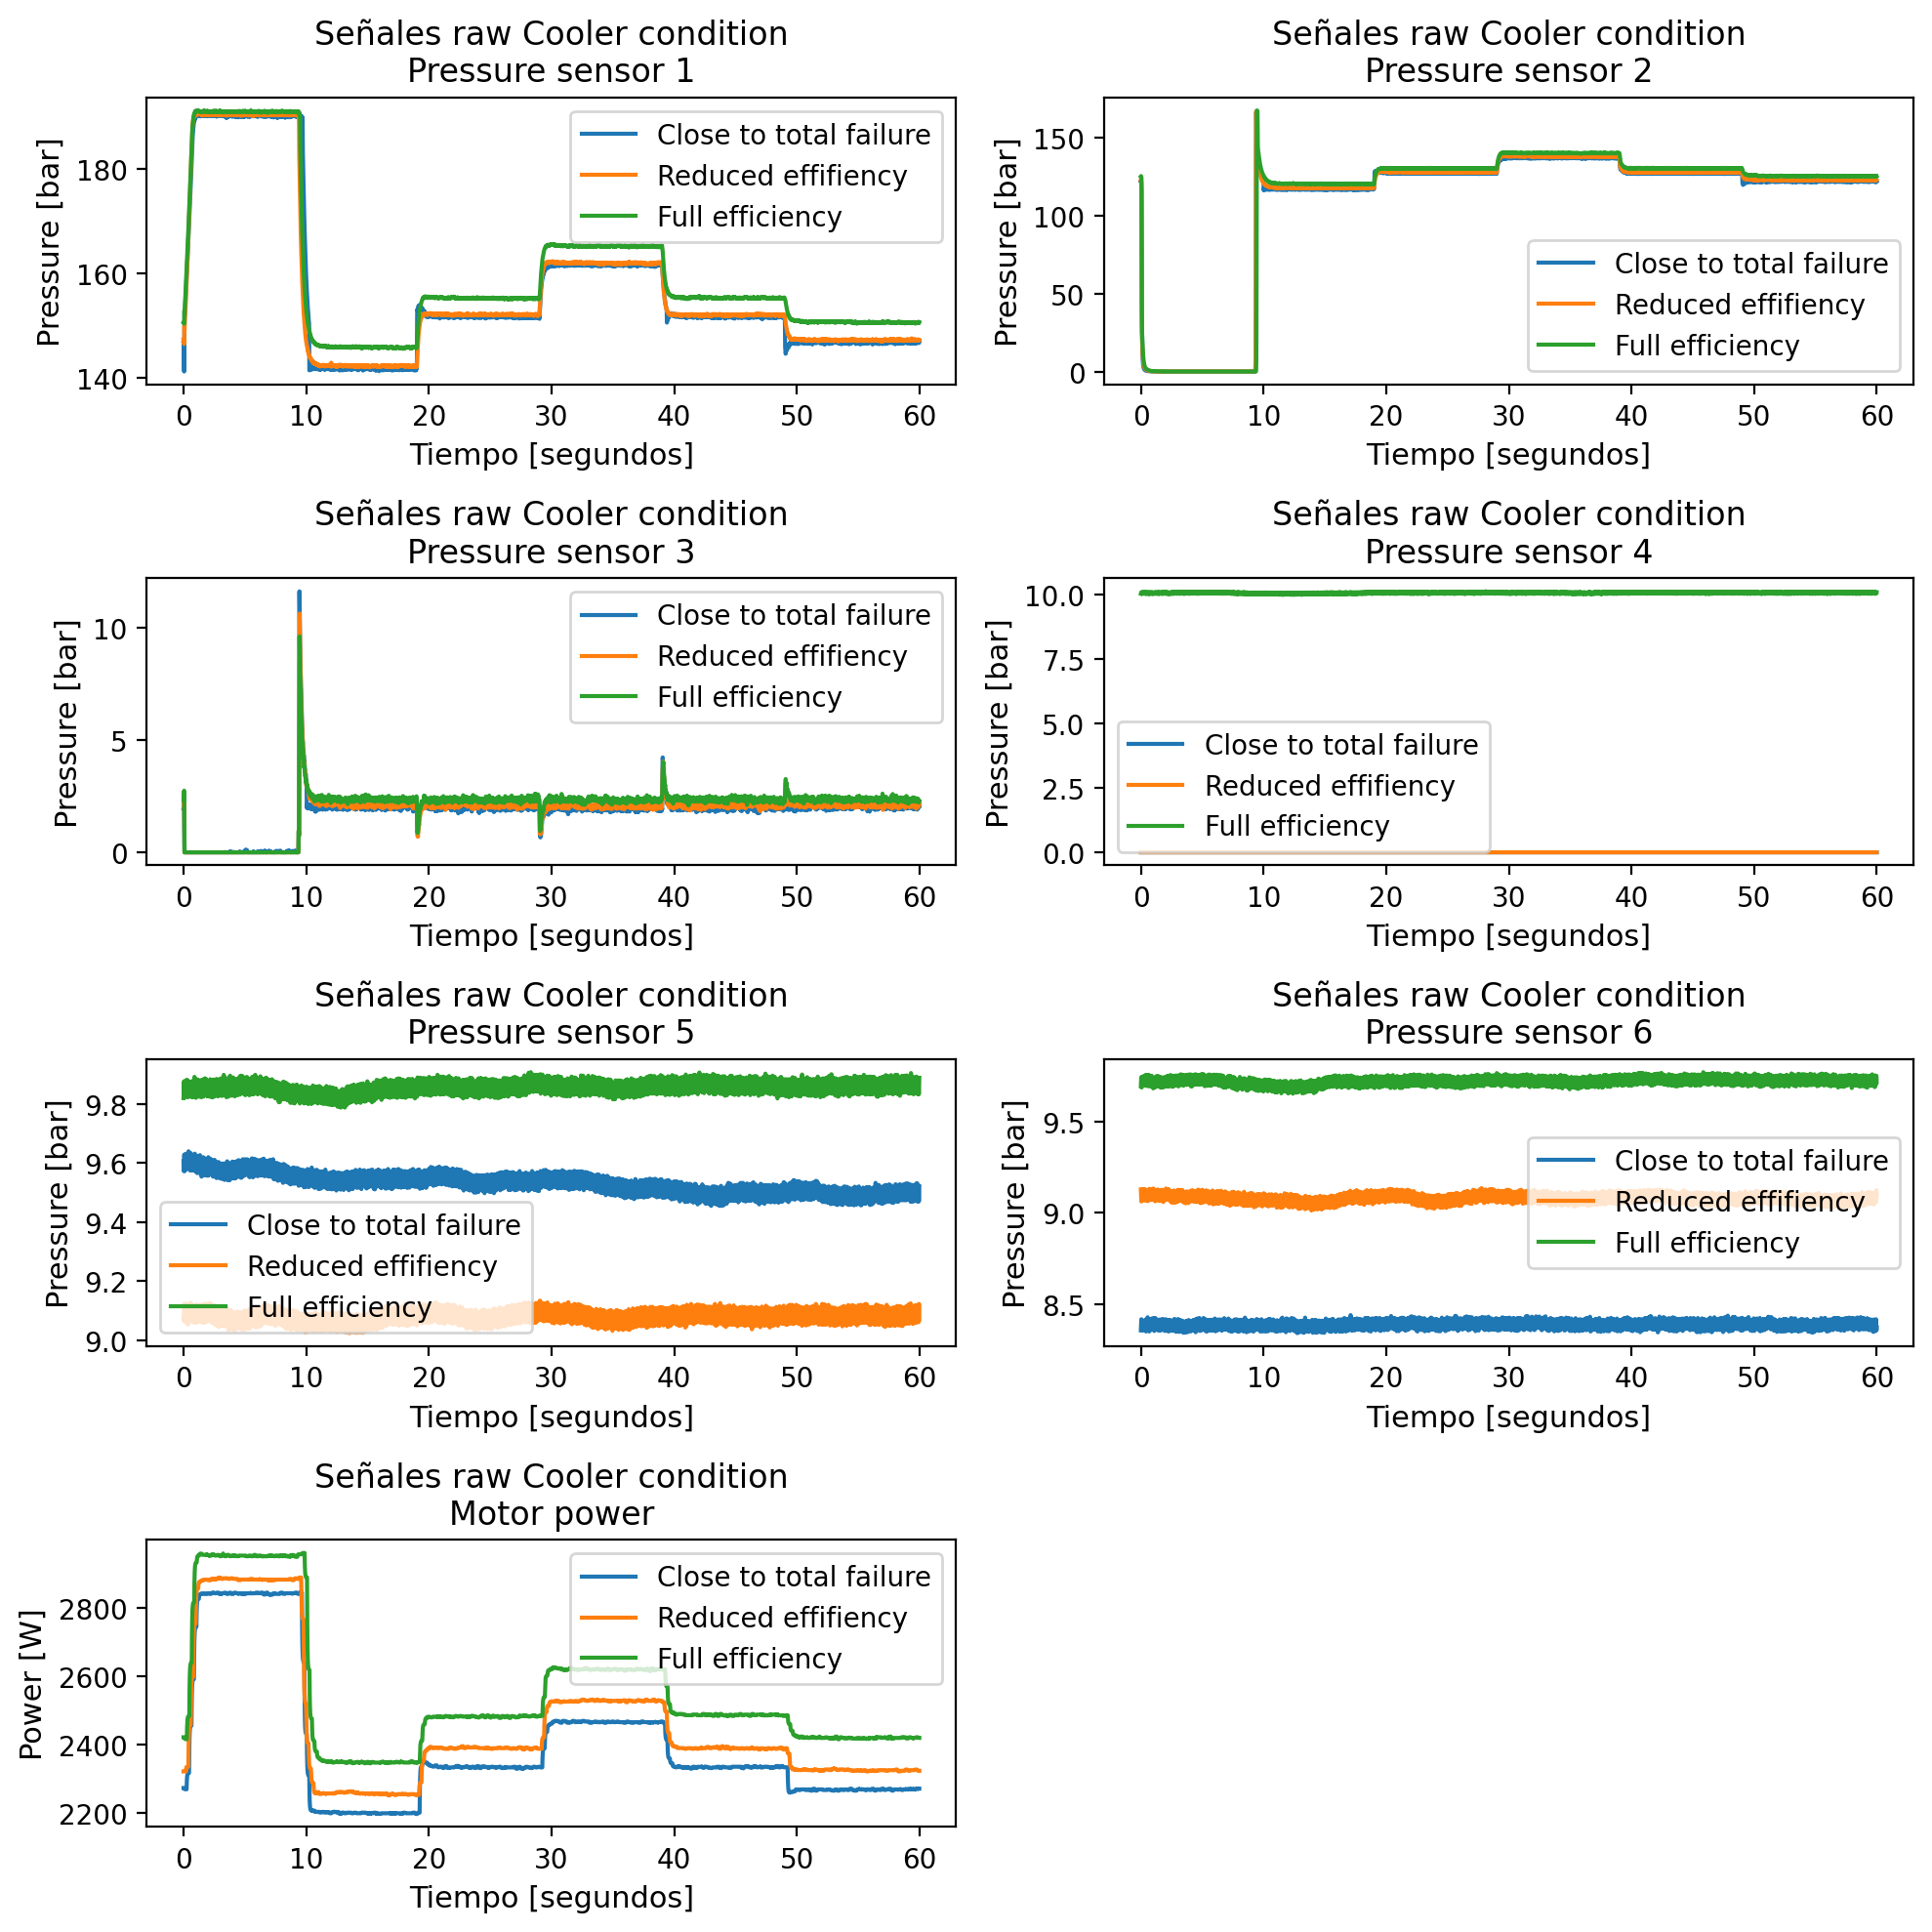

In [ ]:
plt_RawSignals(data_6000,
               'Cooler condition',
               ConditionsLabels_dict,
               profile,               
               fig_sz=(10,10),
               subplt=(4,2))